In [1]:
#importing necessary libraries, just run this part

import numpy as np
import matplotlib.pyplot as plt
from peakBasedFunctions import voigtNUniPeak
from stackingFunctions import widthNormLinStacker
from edibles.utils.functions import vac2air_ciddor
import os.path
from edibles.utils.ContinuumFitter import ContinuumFitter

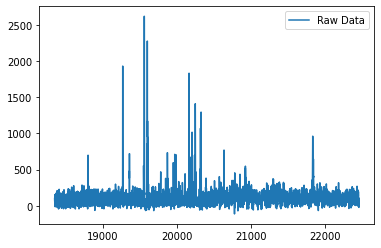

In [2]:
#loading raw data, change the file name for respective molecule and run this part

#put address for file
dataRaw = np.loadtxt(r'C:\Users\hkhan\edibles\edibles\data\Labdata\SchmidtLab\UNSWphenalenyl_D1.DAT', skiprows = 1)
plt.plot(dataRaw[:, 0], dataRaw[:, 1], label = 'Raw Data')
plt.legend()

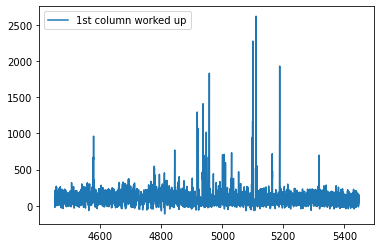

In [3]:
#workup of 1st column of data, change the option and run this part

#If in first column of file - wavelength is given in nm, set option = 0
#                           - wavelength is given in angstrom, set option = 1
#                           - wave number if given in 1/cm, set option = 2
option = 2

data = np.zeros(dataRaw.shape)

if option == 0:
    data[:, 0] = vac2air_ciddor(dataRaw[:, 0]*10.0)
elif option == 1:
    data[:, 0] = vac2air_ciddor(dataRaw[:, 0])
elif option == 2:
    data[:, 0] = vac2air_ciddor((1/dataRaw[:, 0])*1e8)
    
data[:, 1] = dataRaw[:, 1]
    
plt.plot(data[:, 0], data[:, 1], label = '1st column worked up')
plt.legend()

In [4]:
#run this part to select points to find continuum
#select points (in strict increasing wavelength order) by left clicking
#once done selecting, press centre mouse key to end selecting

CF1 = ContinuumFitter(data[:, 0], data[:, 1])
CS, contPoints  = CF1.SplineManualAnchor()

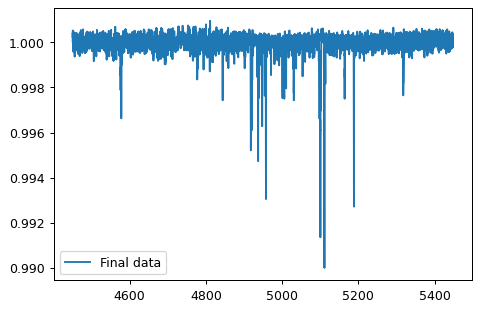

In [5]:
#workup of 2nd column of data, just run this part
#donot run it twice in sequence!!! (run from loading of raw data if you want to run this part again)

data[:, 1] = 1 - 0.01*(dataRaw[:, 1] - CS(data[:, 0]))/(np.max(dataRaw[:, 1]) - CS(data[dataRaw[:, 1] == np.max(dataRaw[:, 1]), 0]))
plt.plot(data[:, 0], data[:, 1], label = 'Final data')
plt.legend()

In [6]:
#run this part to select start and end points of peak (in strict increasing wavelength order)
#select only start and end points of peaks, nothing else
#make sure no. of points selected is two times no. of peaks

CF2 = ContinuumFitter(data[:, 0], data[:, 1])
wvs1 = CF2.SelectPoints(n=100, y_message = 'Select peak start and end points', vetoTimeout = True)[:, 0]
peakRanges = np.reshape(wvs1, (int(wvs1.size/2), 2))

In [13]:
#just run this part to check peak ranges

#peakRanges = np.delete(peakRanges, 3, 0) #use to delete some peaks that just aren't worth changing
print(peakRanges)

[[4574.35121219 4580.46403271]
 [4775.4647501  4780.96329259]
 [4792.8601387  4794.85960859]
 [4872.60898445 4875.90810886]
 [4900.42160183 4902.68100198]
 [4916.78725653 4919.23660612]
 [4919.23660612 4920.7362079 ]
 [4920.98614153 4922.38576985]
 [4933.68276964 4935.88218548]
 [4935.88218548 4938.53148181]
 [4938.58146854 4940.43097729]
 [4940.83087107 4944.17998147]
 [4946.17945035 4948.37886611]
 [4952.77769757 4956.17679457]
 [4956.22678129 4958.22625009]
 [4971.52271733 4971.7226642 ]
 [4977.96100654 4980.89022813]
 [4999.85518781 5001.43476796]
 [5003.60419131 5006.01355087]
 [5006.90331435 5009.23269515]
 [5009.68257556 5011.11219552]
 [5027.38786851 5033.98611409]
 [5034.73591472 5037.28523683]
 [5051.75138981 5057.44987423]
 [5057.67981308 5061.1288957 ]
 [5095.76968018 5098.76888214]
 [5098.76888214 5104.23742697]
 [5109.41604888 5112.33527201]
 [5160.92233837 5165.72106063]
 [5184.92594635 5189.92461504]
 [5315.81106587 5319.04020477]]


In [14]:
#calculation of sd here, just run this part

sdArr = data

for it2 in range(peakRanges.shape[0]):
    #print(np.logical_and(sdArr[:, 0] >= peakRanges[it2, 0], sdArr[:, 0] <= peakRanges[it2, 1]).shape)
    sdArr = np.delete(sdArr, np.logical_and(sdArr[:, 0] >= peakRanges[it2, 0], sdArr[:, 0] <= peakRanges[it2, 1]), 0)

sd = np.std(sdArr[:, 1])
print(sd)

0.0002455276582287832


{'Centre1': 4577.481350240701, 'FWHM1': 2.8217423201591565, 'ChiSq1': 225.30525469208456, 'RedChiSq1': 3.8187331303743144, 'Centre2': 4777.468862211075, 'FWHM2': 2.094895834435647, 'ChiSq2': 62.028698726145706, 'RedChiSq2': 1.1703528061536925, 'Centre3': 4793.7849894754645, 'FWHM3': 0.48879556601064633, 'ChiSq3': 15.706761082703732, 'RedChiSq3': 0.8725978379279851, 'Centre4': 4874.342370173088, 'FWHM4': 0.7949319416822581, 'ChiSq4': 37.755959252092715, 'RedChiSq4': 0.8989514107641122, 'Centre5': 4901.714617335479, 'FWHM5': 0.6362505602681365, 'ChiSq5': 22.94482543483975, 'RedChiSq5': 0.8194580512442767, 'Centre6': 4918.13309243953, 'FWHM6': 1.13302858837987, 'ChiSq6': 275.4577067121118, 'RedChiSq6': 5.860802270470464, 'Centre7': 4919.835560540551, 'FWHM7': 0.4857460543269214, 'ChiSq7': 8.048245322197772, 'RedChiSq7': 0.2874373329356347, 'Centre8': 4921.4262889214, 'FWHM8': 0.29981063591541374, 'ChiSq8': 33.825638837787416, 'RedChiSq8': 1.3009861091456698, 'Centre9': 4934.845303696546, 

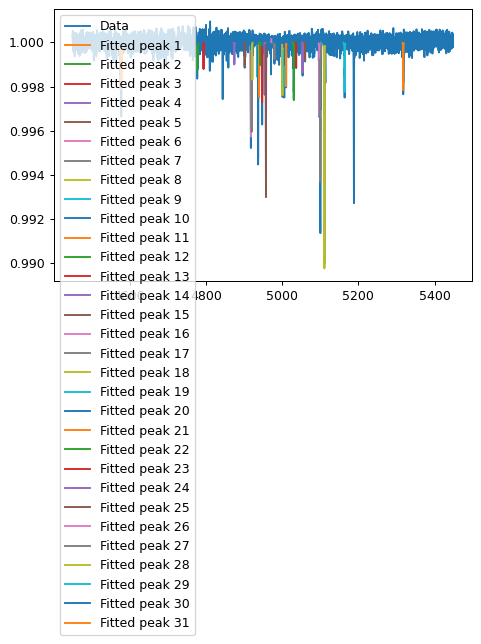

In [15]:
#fitting part, just run this part

plt.plot(data[:, 0], data[:, 1], label = 'Data')
rawParams = voigtNUniPeak(data, peakRanges, sd)
plt.legend()
print(rawParams)

In [16]:
#to load raw parameters into array passable in stacker, change the file name according to molecule and run this part
#if you want to force edit, change fEdit to 1, otherwise keep it to 0

fEdit = 0

params = np.zeros((peakRanges.shape[0], 2))

for it1 in range(peakRanges.shape[0]):
    lab1 = 'Centre' + str(it1+1)
    lab2 = 'FWHM' + str(it1+1)
    params[it1, 0] = rawParams[lab1]
    params[it1, 1] = rawParams[lab2]

print(params)

#change fileName here according to molecule
fileName = 'Lab Spectra Parameters/PhenalenylParams.txt'

if (not os.path.exists(fileName)) or fEdit == 1:
    np.savetxt(fileName, params)

[[4.57748135e+03 2.82174232e+00]
 [4.77746886e+03 2.09489583e+00]
 [4.79378499e+03 4.88795566e-01]
 [4.87434237e+03 7.94931942e-01]
 [4.90171462e+03 6.36250560e-01]
 [4.91813309e+03 1.13302859e+00]
 [4.91983556e+03 4.85746054e-01]
 [4.92142629e+03 2.99810636e-01]
 [4.93484530e+03 9.98990263e-01]
 [4.93687442e+03 5.36554272e-01]
 [4.93925987e+03 4.79725379e-01]
 [4.94251565e+03 3.86479624e-01]
 [4.94739321e+03 9.34315217e-01]
 [4.95433821e+03 4.91555639e-01]
 [4.95745728e+03 4.77516102e-01]
 [4.97143189e+03 9.21826539e-02]
 [4.97968743e+03 1.22972037e+00]
 [5.00081169e+03 5.78618134e-01]
 [5.00503466e+03 1.61397412e+00]
 [5.00796418e+03 8.26646428e-01]
 [5.01030101e+03 3.99199847e-01]
 [5.03049710e+03 4.35460941e-01]
 [5.03662077e+03 5.00321259e-01]
 [5.05351294e+03 4.58585623e-01]
 [5.06014585e+03 4.69609685e-01]
 [5.09801502e+03 7.56541843e-01]
 [5.10008436e+03 1.24590894e+00]
 [5.11084947e+03 5.54525543e-01]
 [5.16387444e+03 8.80740397e-01]
 [5.18820894e+03 5.00855465e-01]
 [5.317572

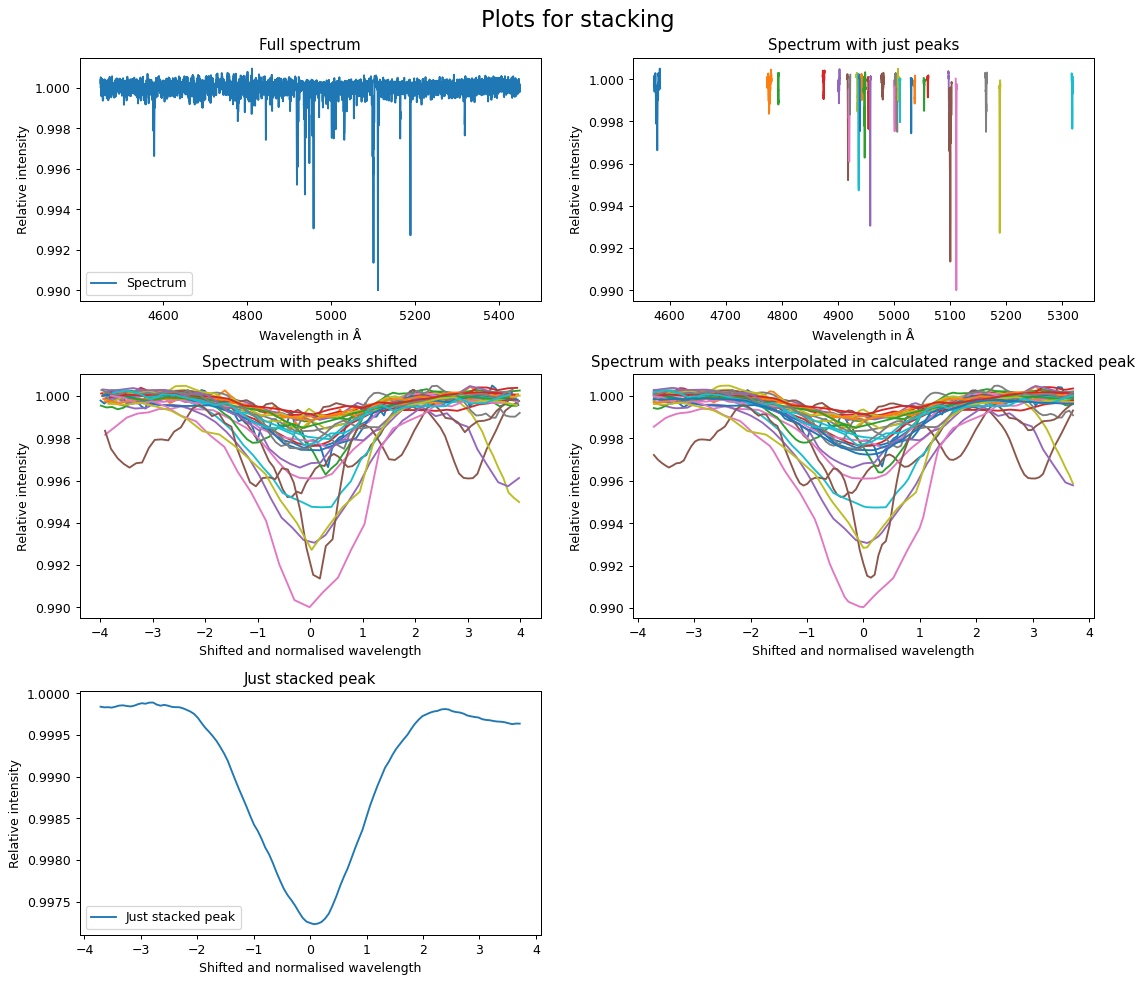

In [17]:
#stacking for checking, just run this part

stackedData = widthNormLinStacker(data, params)